# 1. Import packages

In [5]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap
from PyComplexHeatmap import *

# 2. Generate dataset

In [6]:
#Generate example dataset (random)
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

# Test the row / col orders

              AB CD EF         F
sample1   AAAA1   C  E -0.921718
sample2   AAAA1   C  E  0.082839
sample3   AAAA1   C  E -0.472476
sample4   AAAA1   D  E -0.913480
sample5   AAAA1   D  E -1.242914
sample6   BBBBB2  D  E -1.488496
sample7   BBBBB2  G  F  1.156702
sample8   BBBBB2  G  F  0.075899
sample9   BBBBB2  G  H  0.510023
sample10  BBBBB2  G  H  0.109186
        sample1   sample2   sample3   sample4   sample5   sample6   sample7  \
Fea1  -0.320074  0.142647  0.766791 -1.890648  1.354933  1.588470  0.123032   
Fea2  -1.089846 -1.499082 NaN        1.260756  0.000706 -1.546759  0.719307   
Fea3  -0.286120  0.001423 -0.725629  1.560215  1.182950  0.548244 -0.651514   
Fea4  -0.651668 -0.086397  2.010626 -0.339118 -0.247794  0.626732 -0.737057   
Fea5  -0.048389  1.089152 -0.675546  0.954439 -1.589891 -1.873957 -1.417824   
...         ...       ...       ...       ...       ...       ...       ...   
Fea26 -0.777428 -0.269707 -0.158999  0.097479 -0.263912 -1.066837  0.215359   
Fea27

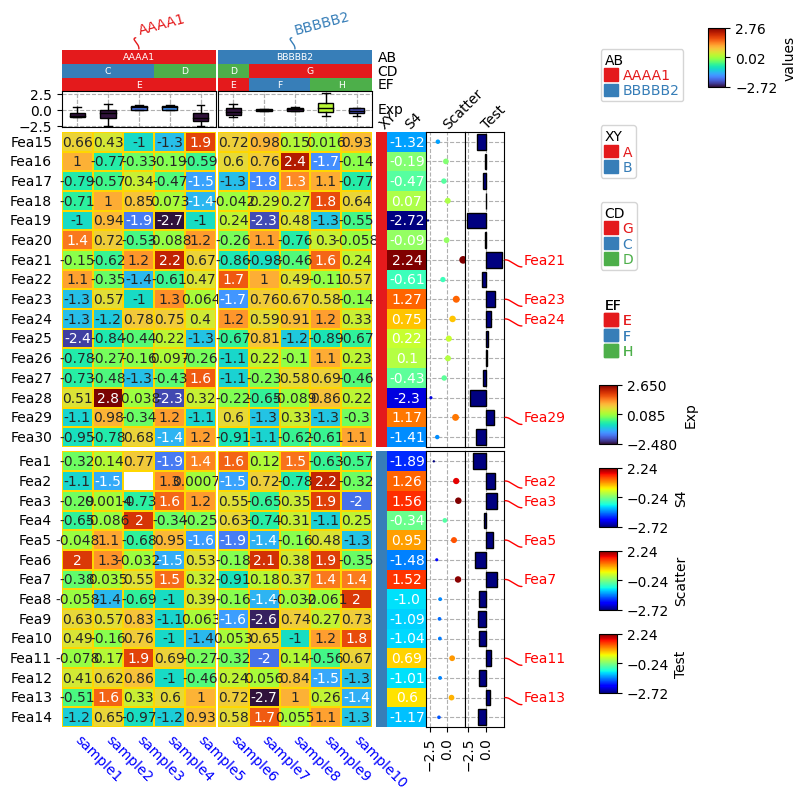

[['Fea15', 'Fea16', 'Fea17', 'Fea18', 'Fea19', 'Fea20', 'Fea21', 'Fea22', 'Fea23', 'Fea24', 'Fea25', 'Fea26', 'Fea27', 'Fea28', 'Fea29', 'Fea30'], ['Fea1', 'Fea2', 'Fea3', 'Fea4', 'Fea5', 'Fea6', 'Fea7', 'Fea8', 'Fea9', 'Fea10', 'Fea11', 'Fea12', 'Fea13', 'Fea14']]
[['sample1', 'sample2', 'sample3', 'sample4', 'sample5'], ['sample6', 'sample7', 'sample8', 'sample9', 'sample10']]


In [11]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(XY=anno_simple(df_rows.XY),
                            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                           add_text=True,height=10,
                                           text_kws={'rotation':0,'fontsize':10,'color':'black'}),
                           Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=10),
                           Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                                            height=10),
                           selected=anno_label(df_rows,colors='red'),
                           axis=0,verbose=0,label_kws={'rotation':45})

col_ha = HeatmapAnnotation(label=anno_label(df.AB, merge=True,rotation=15),
                           AB=anno_simple(df.AB,add_text=True),axis=1,
                           CD=anno_simple(df.CD,add_text=True),
                           EF=anno_simple(df.EF,add_text=True,
                                            legend_kws={'frameon':False}),
                           Exp=anno_boxplot(df_box, cmap='turbo'),
                           verbose=0) #verbose=0 will turn off the log.

print(df)
print(df_heatmap)
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
                       col_split=df.AB,row_split=df_rows.XY, col_split_gap=0.5,row_split_gap=1,
                       col_cluster=False,row_cluster=False,
                       label='values',row_dendrogram=False,show_rownames=True,show_colnames=True,
                         tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=7,
                       annot=True,linewidths=0.05,linecolor='gold',cmap='turbo',
                      xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()
print(cm.row_order)
print(cm.col_order)

In [4]:
df_rows

,Selected,XY
Fea1,Fea1,B
Fea2,None,B
Fea3,None,B
Fea4,None,B
Fea5,None,B
...,...,...
Fea26,Fea26,A
Fea27,None,A
Fea28,None,A
Fea29,None,A
